In [149]:
# Nhập thư viện Scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import Day


In [150]:
#import file csv
STB = pd.read_csv("/Users/baoan/Desktop/STB-Historical-Data.csv")

In [151]:
STB

,Date,Price,Open,High,Low,Vol.,Change %
0,2017-12-01,13000.0,13050.0,13100.0,12900.0,3.31M,-0.76%
1,2017-12-04,13700.0,13100.0,13700.0,13050.0,10.09M,5.38%
2,2017-12-05,13000.0,13700.0,13700.0,13000.0,5.93M,-5.11%
3,2017-12-06,13250.0,13000.0,13250.0,12800.0,7.18M,1.92%
4,2017-12-07,13000.0,13300.0,13350.0,12850.0,5.84M,-1.89%
...,...,...,...,...,...,...,...
1324,2023-03-27,25500.0,25050.0,25700.0,24950.0,16.70M,1.80%
1325,2023-03-28,25400.0,25900.0,26000.0,25300.0,17.18M,-0.39%
1326,2023-03-29,25350.0,25500.0,25650.0,25150.0,16.81M,-0.20%
1327,2023-03-30,26000.0,25700.0,26450.0,25400.0,39.40M,2.56%


In [156]:
X = STB[['Open', 'High', 'Low']]
y = STB['Price']

In [157]:
knn = KNeighborsRegressor(n_neighbors=5)

In [158]:
knn.fit(X, y)

KNeighborsRegressor()

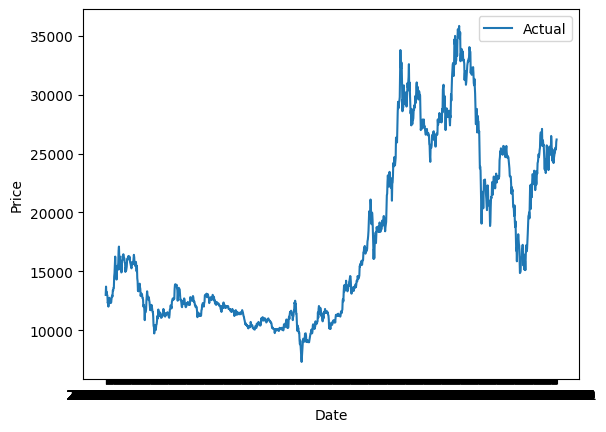

In [159]:
# biểu đồ dữ liệu mẫu
fig, ax = plt.subplots()
ax.plot(STB['Date'], STB['Price'], label='Actual')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()

In [160]:
# dữ liệu tiền xử lý
scaler = MinMaxScaler()
STB['Price'] = scaler.fit_transform(STB[['Price']])

In [161]:
# tách dữ liệu ra thành tập huấn và kiểm tra
train_size = int(len(STB) * 0.8)
train_data = STB[:train_size]
test_data = STB[train_size:]


In [162]:
# train model
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(train_data[['Price']], train_data[['Price']])

KNeighborsRegressor()

In [163]:
test_predictions = knn.predict(test_data[['Price']])
test_rmse = np.sqrt(mean_squared_error(test_data[['Price']], test_predictions))
print('RMSE on test set:', test_rmse)

RMSE on test set: 0.003747174566991383


In [164]:
# Predict 5 days
last_price = STB.iloc[-1]['Price']
next_prices = []
for i in range(10):
    next_price = knn.predict(np.array([[last_price]]))[0][0]
    next_prices.append(next_price)
    last_price = next_price

# Denormalize prices
next_prices = scaler.inverse_transform(np.array(next_prices).reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning

In [165]:
print('Predicted prices for the next 5 days:')
for i, price in enumerate(next_prices):
    print(f'Day {i+1}: {price[0]:,.2f} USD')

Predicted prices for the next 5 days:
Day 1: 26,210.00 USD
Day 2: 26,250.00 USD
Day 3: 26,250.00 USD
Day 4: 26,250.00 USD
Day 5: 26,250.00 USD
Day 6: 26,250.00 USD
Day 7: 26,250.00 USD
Day 8: 26,250.00 USD
Day 9: 26,250.00 USD
Day 10: 26,250.00 USD


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


TypeError: float() argument must be a string or a real number, not 'Timestamp'

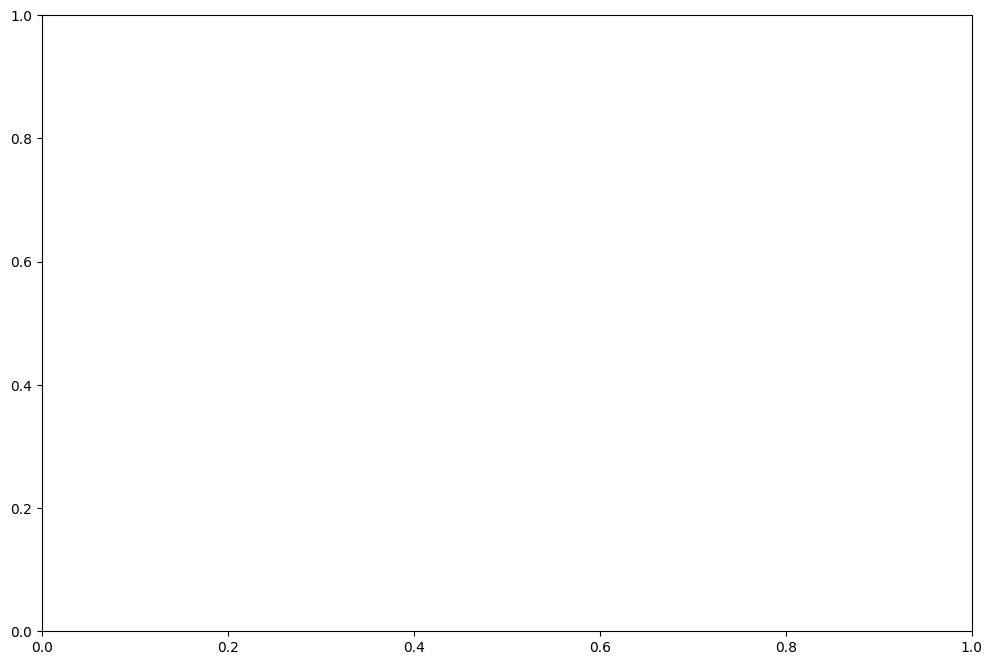

In [180]:
# Lấy ngày của 10 ngày tiếp theo
next_10_days = pd.date_range(start=STB.index[-1], periods=10, freq='D').values.reshape(-1, 1)

# Lấy giá dự đoán của 10 ngày tiếp theo
predicted_prices = knn.predict(next_10_days)

# Thêm các giá trị dự đoán vào DataFrame
predicted_df = pd.DataFrame(index=pd.to_datetime(next_10_days.flatten()), columns=STB.columns)
predicted_df['Price'] = predicted_prices

# Ghép DataFrame của dữ liệu thực tế và dữ liệu dự đoán
combined_df = pd.concat([STB, predicted_df])

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
plt.plot(combined_df.index, combined_df['Price'], label='Actual and Predicted Price')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction Using KNN')
plt.show()